<h2>Predição resultado final com base em chutes a gol e potência de times</h2>

#Funções

In [0]:
def GetGrandeza(time):
  supertimes= "Paris SG,Lyon,Roma,Milan,Inter,Lazio,Barcelona,Real Madrid,Ath Madrid,Leverkusen,Bayern Munich"
  timesbons = "FiorentinaCelta de Vigo,Villarreal,Sevilla,Ath Bilbao,Werder Bremen,Wolfsburg,RB Leipzig,Schalke 04"
  retorno = 3
  if supertimes.find(time)>-1:
    retorno = 1
  if timesbons.find(time)>-1:
    retorno = 2
  
  return retorno

def Converter(text):
  retorno = '-1'
  if text == 'A':
    retorno=1
  elif text == 'D':
    retorno = 2
  elif text == 'H':
    retorno = 0
  return retorno

def GetBolsa(B365H,B365A,B365D):
  retorno = 0
  if min(B365H,B365A,B365D) == B365H:
    return retorno
  

def GetBolsaFora(B365H,B365A,B365D):
  retorno = 0
  if min(B365H,B365A,B365D) == B365A:
    return retorno
 
def GetBolsaEmpate(B365H,B365A,B365D):
  retorno = 0
  if min(B365H,B365A,B365D) == B365D:
    return retorno

def DesConverter(text):
    retorno = '-1'
    if text == 1:
      retorno='Away'
    elif text == 2:
      retorno = 'Draw'
    elif text == 0:
      retorno = 'Home'
    return retorno

def GetGrandezaCluster(time):
    grupo['cluster'] = kmeans.labels_
    retorno = grupo[grupo['NOME']==time]['cluster']
    return int(retorno)

#Importando bibliotecas

In [0]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as pl
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=warnings.)


#Importação datasets

In [0]:

dsLaLiga1617 = pd.read_csv('laliga-1617_csv.csv')
dsLaLiga1718 = pd.read_csv('laliga-1718_csv.csv')
dsLaLiga1819 = pd.read_csv('laliga-1819_csv.csv')

dsPremier1617 = pd.read_csv('season-1617_csv.csv')
dsPremier1718 = pd.read_csv('season-1718_csv.csv')
dsPremier1819 = pd.read_csv('season-1819_csv.csv')

#dsTodos = pd.concat([ dsLaLiga1819,dsLaLiga1617,dsLaLiga1718,dsPremier1617,dsPremier1718,dsPremier1819])
#dsTodos = pd.concat([ dsLaLiga1819,dsLaLiga1617,dsLaLiga1718])
dsTodos=dsLaLiga1819.copy()
dsTodos.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 61 entries, Div to PSCA
dtypes: float64(36), int64(19), object(6)
memory usage: 181.2+ KB


In [0]:
dsTodos.sample(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
116,SP1,11/11/2018,Barcelona,Betis,3,4,A,0,2,A,20,15,5,8,13,11,10,5,4,2,1,0,1.18,7.00,13.0,1.19,7.25,14.00,1.20,7.00,13.00,1.22,7.23,13.06,1.18,7.5,13.0,1.18,7.50,13.00,38,1.25,1.21,7.80,7.10,15.00,12.60,31,1.35,1.30,3.65,3.40,20,-2.00,1.98,1.91,2.02,1.95,1.19,7.71,15.00
338,SP1,25/04/2019,Sevilla,Vallecano,5,0,H,0,0,D,20,12,11,3,10,12,5,4,1,2,0,0,1.33,5.25,9.0,1.34,5.50,8.00,1.33,5.60,8.10,1.33,5.77,9.06,1.33,5.5,8.5,1.30,5.75,9.50,35,1.38,1.33,5.90,5.51,9.70,8.63,33,1.47,1.40,3.10,2.88,22,-1.50,2.00,1.88,2.05,1.97,1.24,7.22,11.48
327,SP1,21/04/2019,Levante,Espanol,2,2,D,0,1,A,19,14,5,7,13,15,12,7,4,1,1,0,2.30,3.50,3.0,2.20,3.60,3.10,2.30,3.60,2.95,2.33,3.77,3.03,2.30,3.6,3.0,2.30,3.70,2.90,34,2.35,2.30,3.77,3.62,3.10,2.97,33,1.70,1.64,2.35,2.25,19,-0.50,2.35,2.29,1.70,1.66,2.37,3.47,3.17
9,SP1,20/08/2018,Valencia,Ath Madrid,1,1,D,0,1,A,13,9,4,3,10,15,4,10,2,3,0,0,3.00,3.20,2.5,2.85,3.25,2.55,2.85,3.20,2.55,3.12,3.18,2.57,3.00,3.2,2.4,3.00,3.20,2.45,39,3.12,2.99,3.29,3.14,2.61,2.51,36,2.45,2.33,1.65,1.59,17,0.25,1.82,1.75,2.23,2.12,3.55,3.28,2.28
304,SP1,07/04/2019,Alaves,Leganes,1,1,D,1,0,H,6,9,1,5,17,15,3,3,6,4,0,0,2.50,3.00,3.1,2.50,2.90,3.25,2.50,2.95,3.25,2.58,3.02,3.33,2.40,3.1,3.2,2.55,3.00,3.30,34,2.58,2.49,3.15,2.98,3.35,3.25,32,2.86,2.68,1.51,1.46,19,-0.25,2.16,2.11,1.82,1.78,2.50,3.03,3.39


#Análises com o dataset

In [0]:
print('verificando tipos dos dados')
dsTodos.dtypes

verificando tipos dos dados


Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
BbMxAHA     float64
BbAvAHA     float64
PSCH        float64
PSCD        float64
PSCA        float64
Length: 61, dtype: object

In [0]:
print('Amostra dos dados')
dsTodos.sample(5)

Amostra dos dados


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
167,SP1,23/12/2018,Valencia,Huesca,2,1,H,1,0,H,19,11,8,4,14,15,12,5,7,4,0,0,1.40,4.75,8.00,1.40,4.40,9.00,1.42,4.55,7.90,1.40,4.69,9.64,1.38,4.6,9.5,1.40,4.80,8.50,36,1.45,1.40,4.85,4.59,9.80,8.51,33,1.80,1.73,2.20,2.09,21,-1.50,2.31,2.20,1.75,1.71,1.45,4.30,9.15
133,SP1,01/12/2018,Real Madrid,Valencia,2,0,H,1,0,H,13,7,3,2,11,10,2,2,1,3,0,0,1.44,4.75,7.00,1.45,4.75,6.50,1.50,4.80,5.60,1.47,4.84,6.99,1.44,4.6,7.0,1.45,4.80,7.00,37,1.51,1.45,5.00,4.73,7.50,6.72,35,1.55,1.50,2.71,2.55,22,-1.00,1.75,1.71,2.25,2.18,1.62,4.16,5.85
31,SP1,15/09/2018,Ath Madrid,Eibar,1,1,D,0,0,D,18,12,9,3,5,21,14,3,2,2,0,0,1.36,4.33,12.00,1.36,4.60,10.00,1.35,4.70,10.00,1.36,4.78,11.13,1.36,4.5,9.0,1.40,4.75,9.50,39,1.41,1.37,4.82,4.56,12.00,10.12,38,2.10,2.03,1.85,1.79,23,-1.25,2.00,1.94,1.98,1.92,1.42,4.00,12.96
152,SP1,15/12/2018,Getafe,Sociedad,1,0,H,1,0,H,9,9,2,4,24,14,2,3,3,4,0,0,2.25,3.10,3.50,2.30,3.10,3.40,2.20,3.20,3.50,2.35,3.16,3.52,2.30,3.0,3.5,2.30,3.13,3.60,36,2.40,2.31,3.20,3.09,3.60,3.44,33,2.67,2.56,1.55,1.49,21,-0.25,2.00,1.95,1.96,1.91,2.35,3.12,3.59
54,SP1,26/09/2018,Sevilla,Real Madrid,3,0,H,3,0,H,16,21,7,3,16,12,5,6,3,4,0,0,4.33,4.20,1.72,4.33,4.20,1.72,4.05,4.20,1.75,4.23,4.27,1.79,3.90,4.2,1.8,4.33,4.40,1.75,40,4.33,4.16,4.40,4.23,1.81,1.76,35,1.45,1.42,2.88,2.79,22,1.00,1.72,1.66,2.32,2.26,4.44,4.29,1.76


In [0]:
print('Quantidade de jogos por time')
print(dsTodos['HomeTeam'].value_counts())

Quantidade de jogos por time
Valladolid     19
Leganes        19
Huesca         19
Betis          19
Valencia       19
Alaves         19
Levante        19
Celta          19
Getafe         19
Eibar          19
Villarreal     19
Real Madrid    19
Ath Madrid     19
Espanol        19
Ath Bilbao     19
Barcelona      19
Sociedad       19
Sevilla        19
Girona         19
Vallecano      19
Name: HomeTeam, dtype: int64


In [0]:
print('\nAnálise de gols em casa x fora')
time='Barcelona'
dsTimeEmCasa = dsTodos.loc[dsTodos['HomeTeam']==time]
dsTimeFora = dsTodos.loc[dsTodos['AwayTeam']==time]
print('media de gols do time em casa é ',time,dsTimeEmCasa['FTHG'].mean())
print('media de gols do time fora de casa é ',time,dsTimeFora['FTAG'].mean())


Análise de gols em casa x fora
media de gols do time em casa é  Barcelona 2.6842105263157894
media de gols do time fora de casa é  Barcelona 2.0526315789473686


#Limpeza e Tratamento dos dados


In [0]:
dsTratado = dsTodos[['HomeTeam','AwayTeam','FTHG','FTAG','HTHG', 'HTAG', 'HS','HTR', 'AS','FTR']].copy()
dsTratado

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR
0,Betis,Levante,0,3,0,1,22,A,6,A
1,Girona,Valladolid,0,0,0,0,13,D,2,D
2,Barcelona,Alaves,3,0,0,0,25,D,3,H
3,Celta,Espanol,1,1,0,1,12,A,14,D
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A
...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H
377,Valladolid,Valencia,0,2,0,1,19,A,9,A
378,Eibar,Barcelona,2,2,2,2,15,D,6,D


No código abaixo:

<p>Adicionada coluna VENC pra expressar de forma numerica o ganhador da partida</p>
<p>Atributos GH,e GA (Grandeza Home e Grandeza Away) é calculada de acordo com o 'feeling')</p>
<p>coluna VENC_1T para expressar em forma numerica quem esta ganhando no primeiro tempo</p>
<p>campos BOLSACASA, EMPATE e FORA foram pra expressar a ODD inicial da casa de apostas</p>

In [0]:
dsTratado['GH'] = dsTratado.apply(lambda row: GetGrandeza(row.HomeTeam), axis = 1)
dsTratado['GA'] = dsTratado.apply(lambda row: GetGrandeza(row.AwayTeam), axis = 1)
dsTratado['VENC'] = dsTratado.apply(lambda row: Converter(row.FTR), axis = 1)
dsTratado['VENC_1T'] = dsTratado.apply(lambda row: Converter(row.HTR), axis = 1)
#dsTratado['BOLSACASA'] = dsTratado.apply(lambda row: [0, 1][min(row.B365H,row.B365A,row.B365D)==row.B365H], axis=1)
#dsTratado['BOLSAFORA'] = dsTratado.apply(lambda row: [0, 1][min(row.B365H,row.B365A,row.B365D)==row.B365A], axis=1)
#dsTratado['BOLSAEMPATE'] = dsTratado.apply(lambda row: [0, 1][min(row.B365H,row.B365A,row.B365D)==row.B365D], axis=1)

dsTratado

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,GH,GA,VENC,VENC_1T
0,Betis,Levante,0,3,0,1,22,A,6,A,3,3,1,1
1,Girona,Valladolid,0,0,0,0,13,D,2,D,3,3,2,2
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,1,3,0,2
3,Celta,Espanol,1,1,0,1,12,A,14,D,2,3,2,1
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,3,1,2,0
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,2,2,0,0
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,3,3,1,1
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,3,1,2,2


In [0]:
import pandas_profiling as pp
pp.ProfileReport(dsTratado)

Number of variables,14
Number of observations,380
Total Missing (%),0.0%
Total size in memory,41.7 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
dsTimeHome =  dsTratado.copy()
dsTimeHome['NOME'] = dsTimeHome['HomeTeam']

dsTimeHome['VITORIA'] = dsTimeHome.apply(lambda row: [0, 1][row['VENC'] ==0], axis=1)
dsTimeHome['DERROTA'] = dsTimeHome.apply(lambda row: [0, 1][row['VENC'] ==1], axis=1)
dsTimeHome['EMPATE'] = dsTimeHome.apply(lambda row: [0, 1][row['VENC'] ==2], axis=1)

dsTimeFora =  dsTratado.copy()
dsTimeFora['NOME'] = dsTimeFora['AwayTeam']

dsTimeFora['VITORIA'] = dsTimeFora.apply(lambda row: [0, 1][row['VENC'] ==1], axis=1)
dsTimeFora['DERROTA'] = dsTimeFora.apply(lambda row: [0, 1][row['VENC'] ==0], axis=1)
dsTimeFora['EMPATE'] = dsTimeFora.apply(lambda row: [0, 1][row['VENC'] ==2], axis=1)

dsTimeHome

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,GH,GA,VENC,VENC_1T,NOME,VITORIA,DERROTA,EMPATE
0,Betis,Levante,0,3,0,1,22,A,6,A,3,3,1,1,Betis,0,1,0
1,Girona,Valladolid,0,0,0,0,13,D,2,D,3,3,2,2,Girona,0,0,1
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,1,3,0,2,Barcelona,1,0,0
3,Celta,Espanol,1,1,0,1,12,A,14,D,2,3,2,1,Celta,0,0,1
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,2,3,1,2,Villarreal,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,3,1,2,0,Levante,0,0,1
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,2,2,0,0,Sevilla,1,0,0
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,3,3,1,1,Valladolid,0,1,0
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,3,1,2,2,Eibar,0,0,1


In [0]:

dsTimeUnificado = pd.concat([dsTimeHome, dsTimeFora])

dsTimeUnificado.groupby('NOME')['VITORIA'].sum()
grupo=dsTimeUnificado.groupby('NOME', as_index=False).agg({"VITORIA": "sum"}).sort_values('VITORIA',ascending=False)

grupo['ID'] = np.arange(len(grupo))

print(grupo)

           NOME  VITORIA  ID
3     Barcelona       26   0
2    Ath Madrid       22   1
13  Real Madrid       21   2
14      Sevilla       17   3
8        Getafe       15   4
16     Valencia       15   5
4         Betis       14   6
7       Espanol       14   7
0        Alaves       13   8
15     Sociedad       13   9
1    Ath Bilbao       13  10
6         Eibar       11  11
11      Leganes       11  12
12      Levante       11  13
17   Valladolid       10  14
19   Villarreal       10  15
5         Celta       10  16
9        Girona        9  17
18    Vallecano        8  18
10       Huesca        7  19


#Clusterizando para tabela SUPERTIMES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtyp

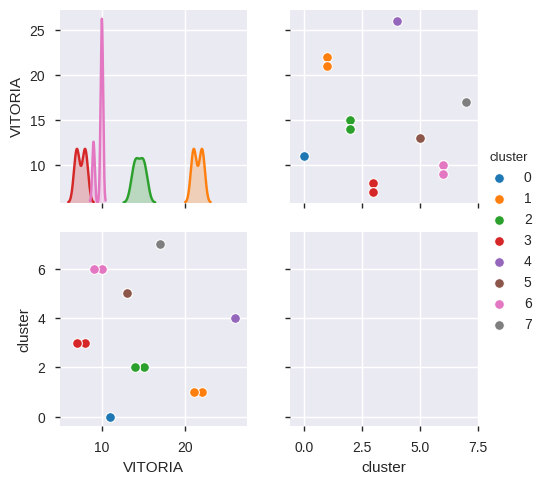

In [0]:
dfCluster = grupo[['VITORIA']]
X = np.array(dfCluster)
from sklearn.cluster import KMeans
kmeans = KMeans( random_state=0)
kmeans.fit(X)
dfCluster['cluster'] = kmeans.labels_
sb.pairplot(dfCluster,hue='cluster')
grupo['cluster'] = kmeans.labels_

#SuperTimes Manual
#dsTratado['GH'] = dsTratado.apply(lambda row: GetGrandeza(row.HomeTeam), axis = 1)
#dsTratado['GA'] = dsTratado.apply(lambda row: GetGrandeza(row.AwayTeam), axis = 1)

#SuperTimes Cluster
dsTratado['GH'] = dsTratado.apply(lambda row: GetGrandezaCluster(row.HomeTeam), axis = 1)
dsTratado['GA'] = dsTratado.apply(lambda row: GetGrandezaCluster(row.AwayTeam), axis = 1)


In [0]:
dsTratado.sample(10)

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,GH,GA,VENC,VENC_1T
284,Getafe,Leganes,0,2,0,0,9,D,7,A,2,0,1,2
305,Betis,Villarreal,2,1,1,1,17,D,10,H,2,6,0,2
347,Vallecano,Real Madrid,1,0,1,0,11,H,9,H,3,1,0,0
171,Levante,Girona,2,2,0,1,19,A,9,D,0,6,2,1
215,Betis,Ath Madrid,1,0,0,0,7,D,13,H,2,1,0,2
75,Espanol,Villarreal,3,1,1,1,28,D,13,H,2,6,0,2
59,Vallecano,Espanol,2,2,1,2,11,A,12,D,3,2,2,1
88,Sociedad,Girona,0,0,0,0,14,D,12,D,5,6,2,2
34,Espanol,Levante,1,0,0,0,22,D,16,H,2,0,0,2
109,Espanol,Ath Bilbao,1,0,1,0,8,H,10,H,2,5,0,0


#Regressão com supertimes para análise

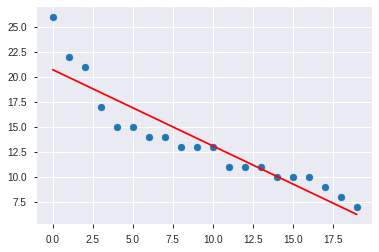

In [0]:
%matplotlib inline
# passando os valores de x e y como Dataframes
dfRegressaoPlot = grupo
X = dfRegressaoPlot[['ID']]
Y = dfRegressaoPlot[['VITORIA']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
pl.scatter(X, Y)

pl.plot(X, Y_pred, color='red')
pl.show()


In [0]:
dsTratado

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,GH,GA,VENC,VENC_1T
0,Betis,Levante,0,3,0,1,22,A,6,A,2,0,1,1
1,Girona,Valladolid,0,0,0,0,13,D,2,D,6,6,2,2
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,4,5,0,2
3,Celta,Espanol,1,1,0,1,12,A,14,D,6,2,2,1
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,6,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,0,1,2,0
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,7,5,0,0
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,6,2,1,1
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,0,4,2,2


#Amostragem
Home=0   Away= 1   Draw=2

In [0]:
#supertime
treinoDataAtePrimeiroTempo  = pd.DataFrame(dsTratado, columns = ['HTHG', 'HTAG','HS','AS', 'GH','GA'])

#sem supertime
#treinoDataAtePrimeiroTempo  = pd.DataFrame(dsTratado, columns = ['HTHG', 'HTAG','HS','AS'])


treinoTargetAtePrimeiroTempo = pd.DataFrame(dsTratado, columns = ['VENC'])

from sklearn.model_selection import train_test_split
X_train_1t, X_test_1t, y_train_1t, y_test_1t = train_test_split(treinoDataAtePrimeiroTempo, \
                                                                treinoTargetAtePrimeiroTempo, test_size=0.30, random_state=44)


treinoDataInicioPartida  = pd.DataFrame(dsTratado, columns = ['GH','GA'])
treinoTargetInicioPartida = pd.DataFrame(dsTratado, columns = ['VENC'])

from sklearn.model_selection import train_test_split
X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(treinoDataInicioPartida, \
                                                                                treinoTargetInicioPartida, test_size=0.30, random_state=44)

#Treinamento 



In [0]:
from sklearn.naive_bayes import GaussianNB
modeloGaussianNB = GaussianNB()
modeloGaussianNB.fit(X_train_1t,y_train_1t)

from sklearn import svm
modeloSVM = svm.SVC(kernel='linear', C = 1.0)
modeloSVM.fit(X_train_1t,y_train_1t)

from sklearn.neighbors import KNeighborsClassifier
modeloKNeighborsClassifier = KNeighborsClassifier(n_neighbors=3)
modeloKNeighborsClassifier.fit(X_train_1t,y_train_1t)


from sklearn.naive_bayes import GaussianNB
modeloGaussianNB_inicio = GaussianNB()
modeloGaussianNB_inicio.fit(X_train_inicio,y_train_inicio)

from sklearn import svm
modeloSVM_inicio = svm.SVC(kernel='linear', C = 1.0)
modeloSVM_inicio.fit(X_train_inicio,y_train_inicio)

from sklearn.neighbors import KNeighborsClassifier
modeloKNeighborsClassifier_inicio = KNeighborsClassifier(n_neighbors=3)
modeloKNeighborsClassifier_inicio.fit(X_train_inicio,y_train_inicio)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#Métricas

In [0]:
previsoesGaussianNB = modeloGaussianNB.predict(X_test_1t)
previsoesSVM = modeloSVM.predict(X_test_1t)
previsoesKNeighborsClassifier = modeloKNeighborsClassifier.predict(X_test_1t)

from sklearn import metrics

print('previsoes entrando com dados no segundo tempo')

print("\nAcurácia Gaussian primeiro tempo:",metrics.accuracy_score(y_test_1t, previsoesGaussianNB))
print("Recall Gaussian primeiro tempo:",metrics.precision_score(y_test_1t, previsoesGaussianNB,average='macro'))
print("Precisão Gaussian primeiro tempo:",metrics.precision_score(y_test_1t, previsoesGaussianNB,average='macro'))

print("Acurácia SVM primeiro tempo:",metrics.accuracy_score(y_test_1t, previsoesSVM))
print("Recall SVM primeiro tempo:",metrics.recall_score(y_test_1t, previsoesSVM,average='macro'))
print("Precisão SVM primeiro tempo:",metrics.precision_score(y_test_1t, previsoesSVM,average='macro'))

print("Acurácia KNeighborsClassifier primeiro tempo:",metrics.accuracy_score(y_test_1t, previsoesKNeighborsClassifier))
print("Recall KNeighborsClassifier primeiro tempo:",metrics.recall_score(y_test_1t, previsoesKNeighborsClassifier,average='macro'))
print("Precisão KNeighborsClassifier primeiro tempo:",metrics.precision_score(y_test_1t, previsoesKNeighborsClassifier,average='macro'))


previsoes entrando com dados no segundo tempo

Acurácia Gaussian primeiro tempo: 0.5
Recall Gaussian primeiro tempo: 0.4411340293693235
Precisão Gaussian primeiro tempo: 0.4411340293693235
Acurácia SVM primeiro tempo: 0.5
Recall SVM primeiro tempo: 0.4767616191904048
Precisão SVM primeiro tempo: 0.3413621262458471
Acurácia KNeighborsClassifier primeiro tempo: 0.40350877192982454
Recall KNeighborsClassifier primeiro tempo: 0.37971398915926646
Precisão KNeighborsClassifier primeiro tempo: 0.3429012345679012


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
previsoesGaussianNB = modeloGaussianNB_inicio.predict(X_test_inicio)
previsoesSVM = modeloSVM_inicio.predict(X_test_inicio)
previsoesKNeighborsClassifier = modeloKNeighborsClassifier_inicio.predict(X_test_inicio)

print('\n\nprevisoes inicio partida com base somente histórica')

print("\nAcurácia Gaussian início partida:",metrics.accuracy_score(y_test_inicio, previsoesGaussianNB))
print("Recall Gaussian início partida:",metrics.precision_score(y_test_inicio, previsoesGaussianNB,average='macro'))
print("Precisão Gaussian início partida:",metrics.precision_score(y_test_inicio, previsoesGaussianNB,average='macro'))

print("Acurácia SVM início partida:",metrics.accuracy_score(y_test_inicio, previsoesSVM))
print("Recall SVM início partida:",metrics.recall_score(y_test_inicio, previsoesSVM,average='macro'))
print("Precisão SVM início partida:",metrics.precision_score(y_test_inicio, previsoesSVM,average='macro'))

print("Acurácia KNeighborsClassifier início partida:",metrics.accuracy_score(y_test_inicio, previsoesKNeighborsClassifier))
print("Recall KNeighborsClassifier início partida:",metrics.recall_score(y_test_inicio, previsoesKNeighborsClassifier,average='macro'))
print("Precisão KNeighborsClassifier início partida:",metrics.precision_score(y_test_inicio, previsoesKNeighborsClassifier,average='macro'))



previsoes inicio partida com base somente histórica

Acurácia Gaussian início partida: 0.37719298245614036
Recall Gaussian início partida: 0.12912912912912913
Precisão Gaussian início partida: 0.12912912912912913
Acurácia SVM início partida: 0.40350877192982454
Recall SVM início partida: 0.3333333333333333
Precisão SVM início partida: 0.13450292397660818
Acurácia KNeighborsClassifier início partida: 0.3333333333333333
Recall KNeighborsClassifier início partida: 0.3040595087071849
Precisão KNeighborsClassifier início partida: 0.296875


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hyperparametros

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_1t, previsoesGaussianNB)) 

              precision    recall  f1-score   support

           0       0.39      0.93      0.55        46
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        39

    accuracy                           0.38       114
   macro avg       0.13      0.31      0.18       114
weighted avg       0.16      0.38      0.22       114



In [0]:
from sklearn.model_selection import GridSearchCV   

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)   

grid.fit(X_train_1t, y_train_1t) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.463, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.453, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.453, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.453, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.463, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.463, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.463, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ............ C=1, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.453, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.434, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.434, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.302, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.463, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.481, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.491, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=10, gamma=1, kernel=rbf, score=0.491, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.377, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.396, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.453, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.377, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.463, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.481, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.491, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.491, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.426, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.358, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.396, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.434, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.377, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.623, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.547, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.481, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.528, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.434, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.481, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.491, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.491, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.426, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.434, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.396, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.528, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.472, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.426, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.585, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.434, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.566, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.528, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.537, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.642, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.453, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.528, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
print(grid.best_params_) 
  
print(grid.best_estimator_) 

grid_predictions = grid.predict(X_test_1t) 
  
print(classification_report(y_test_1t, grid_predictions)) 

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.49      0.89      0.63        46
           1       0.53      0.55      0.54        29
           2       0.00      0.00      0.00        39

    accuracy                           0.50       114
   macro avg       0.34      0.48      0.39       114
weighted avg       0.33      0.50      0.39       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Testando

In [0]:
modelo = modeloGaussianNB

timeHome='Girona'
timeAway='Barcelona'

chutesAGolHome=5
chutesAGolAway=10

golsHome=0
golsAway=0

jogoAtual = [[golsHome,\
              golsAway,\
              chutesAGolHome,\
              chutesAGolAway,\
              GetGrandezaCluster(timeHome),\
              GetGrandezaCluster(timeAway)]]
previsoes = modelo.predict(jogoAtual)

print('A previsão é' ,DesConverter(previsoes))

A previsão é Draw


In [0]:
#treinoTarget.describe()